
# **Análisis exploratorio de datos (EDA) servicios de streaming**

El objetivo de este proyecto es el análisis exploratorio de datos (EDA) en una startup de servicios de streaming.


1. Exploración de un conjunto de datos de servicios de streaming.
2. Crear tablas dinámicas.
3. Visualice el conjunto de datos con varios tipos de gráficos  para la verificar outliers o anomalías.

# Materiales y métodos

Durante el trabajo se resuelve la tarea de análisis preliminar para investigar las relaciones que hay entre las variables de los datasets, ver si hay outliers o anomalías

* Descarga de datos
* Preparación de datos
* Análisis estadístico
* Visualización de datos

## Análisis exploratorio de los datos:


## Importación de librerias

In [55]:
#from pandas_profiling import ProfileReport

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt


%matplotlib inline


## Exploración de conjuntos de datos

En esta sección, explorará el conjunto de datos fuente.

In [2]:

df_data  = pd.read_csv('plataformas.csv')

df_data.head(2)

,id,show_id,plataforma,type,title,director,cast,country,date_added,release_year,rating_x,rating_y,duration_int,duration_type,listed_in,description
0,as1,s1,amazon,movie,the grand seduction,don mckellar,"brendan gleeson, taylor kitsch, gordon pinsent",canada,2021-03-30,2014,g,3.467131,113,min,"comedy, drama",a small fishing village must procure a local d...
1,as2,s2,amazon,movie,take care good night,girish joshi,"mahesh manjrekar, abhay mahajan, sachin khedekar",india,2021-03-30,2018,g+,3.548682,110,min,"drama, international",a metro family decides to fight a cyber crimin...


In [3]:
df_data.shape

(22998, 16)

Inspección de los tipos de las columnas

In [4]:
df_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22998 entries, 0 to 22997
Data columns (total 16 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             22998 non-null  object 
 1   show_id        22998 non-null  object 
 2   plataforma     22998 non-null  object 
 3   type           22998 non-null  object 
 4   title          22998 non-null  object 
 5   director       14739 non-null  object 
 6   cast           17677 non-null  object 
 7   country        11499 non-null  object 
 8   date_added     13444 non-null  object 
 9   release_year   22998 non-null  int64  
 10  rating_x       22998 non-null  object 
 11  rating_y       22998 non-null  float64
 12  duration_int   22998 non-null  int64  
 13  duration_type  22811 non-null  object 
 14  listed_in      22998 non-null  object 
 15  description    22994 non-null  object 
dtypes: float64(1), int64(2), object(13)
memory usage: 2.8+ MB


In [5]:
df_data["date_added"] = pd.to_datetime(df_data.date_added)

In [6]:
df_data = df_data.rename(columns={'rating_y': 'rating'})

In [7]:
df_data.describe()

,date_added,release_year,rating,duration_int
count,13444,22998.000000,22998.000000,22998.000000
mean,2019-08-12 05:31:49.788753408,2010.811244,3.533443,66.613271
min,2006-07-14 00:00:00,1920.000000,3.336478,0.000000
25%,2018-08-31 00:00:00,2010.000000,3.500000,3.000000
50%,2019-11-12 00:00:00,2016.000000,3.533673,84.000000
75%,2020-11-25 00:00:00,2019.000000,3.567000,101.000000
max,2021-11-26 00:00:00,2021.000000,3.724512,601.000000
std,NaN,15.401142,0.048564,51.420367


In [8]:
df_data.isnull().sum()


id                   0
show_id              0
plataforma           0
type                 0
title                0
director          8259
cast              5321
country          11499
date_added        9554
release_year         0
rating_x             0
rating               0
duration_int         0
duration_type      187
listed_in            0
description          4
dtype: int64

Analizando datos duplicados

In [9]:
df_data.duplicated().sum()

0

In [10]:
df_data.fillna(value='N/A', inplace=True)

In [11]:
df_data.isnull().sum()

id               0
show_id          0
plataforma       0
type             0
title            0
director         0
cast             0
country          0
date_added       0
release_year     0
rating_x         0
rating           0
duration_int     0
duration_type    0
listed_in        0
description      0
dtype: int64

## Anális de las variables

<Axes: >

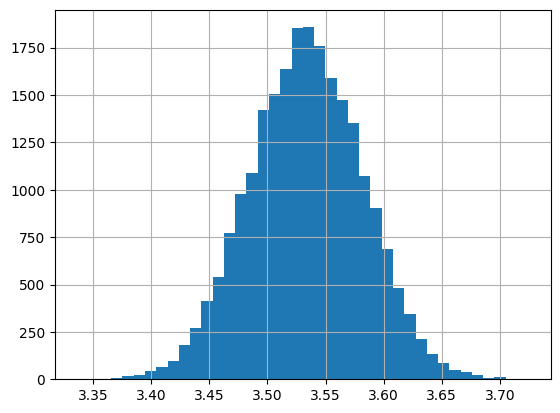

In [12]:
df_data.rating.hist(bins=40)

* Valores de rating que tienen datos normales y un rango de calificación de de 3.35 a 3.7

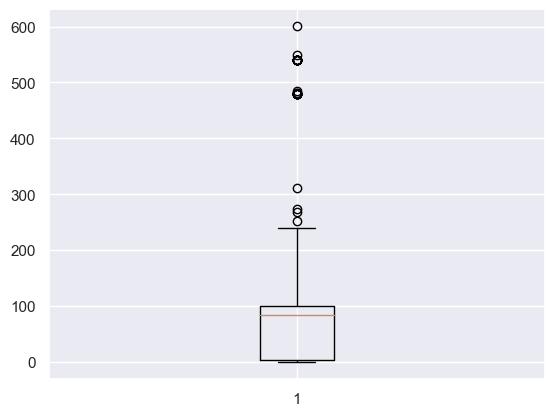

In [56]:
int_values= df_data['duration_int'].dropna().astype(float)
plt.boxplot(int_values)
plt.show()

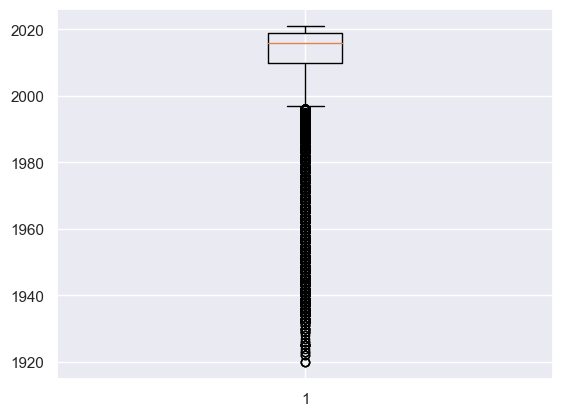

In [57]:
int_values= df_data['release_year'].dropna().astype(int)
plt.boxplot(int_values)
plt.show()

* Se observan gran cantidad de datos atipicos, se puede deber a la baja cantidad de contenido para esos años donde aun no era tan comercial estas plataformas.

Miramos ahora la correlación entre variables,  cuáles son las que más correlación tienen, si tienen demasiada correlación, pueden incluir sesgo, y si tienen muy poca, se pueden eliminar sin afectar el rendimiento

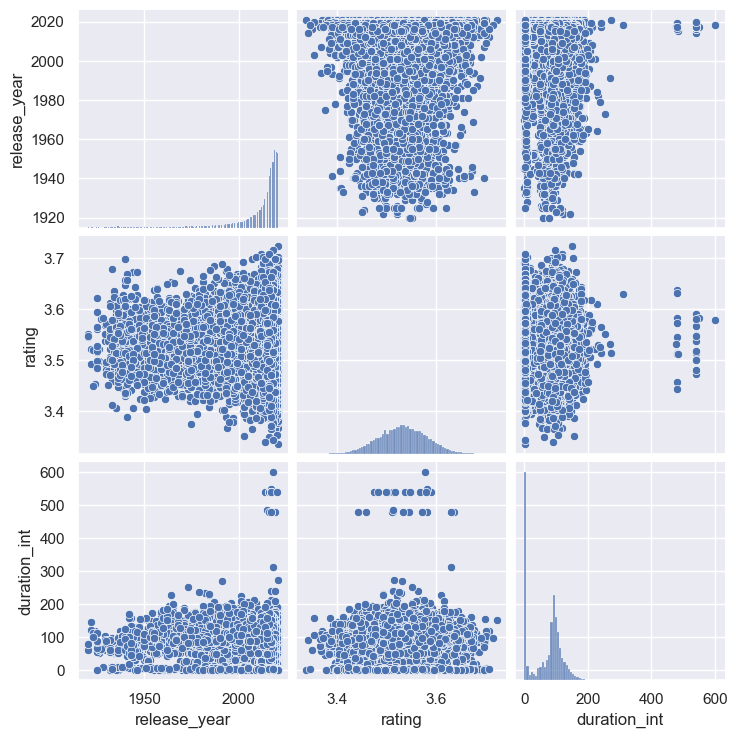

In [13]:
import seaborn as sns
sns.set()
sns.pairplot(data=df_data)

<Axes: >

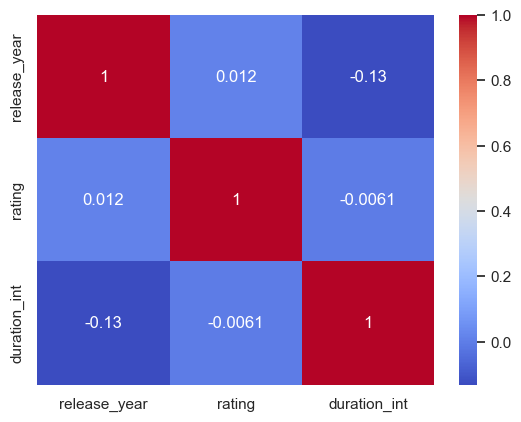

In [14]:
num_vars = df_data.select_dtypes(include=['float64', 'int64'])

# Crear un mapa de calor
sns.heatmap(num_vars.corr(), annot=True, cmap='coolwarm')

* No se observa correlación entre las variables númericas

Peliculas con mayor puntuacón por plataformas

In [23]:
tabla_rating = pd.pivot_table(df_data, values='rating', index='title', columns='plataforma', aggfunc=sum)
tabla_rating = tabla_rating.loc[tabla_rating.sum(axis=1).sort_values(ascending=False).index]
tabla_rating


plataforma,amazon,disney,hulu,netflix
title,,,,
married at first sight,7.028609,NaN,3.458333,3.610577
pick of the litter,NaN,3.625,3.547985,3.622768
moesha,3.523669,NaN,3.634051,3.581028
star trek: the next generation,3.571856,NaN,3.631868,3.534664
child's play,3.583000,NaN,3.576289,3.568080
...,...,...,...,...
diwan,3.352008,NaN,NaN,NaN
"thomas & friends: the great race (us english, brazilian portuguese, latin america spanish)",3.348970,NaN,NaN,NaN
marvel's luke cage,NaN,NaN,NaN,3.344538


Total de películas por año y plataformas

In [33]:
tabla_plataforma_año = pd.pivot_table(df_data, values='title', index=['release_year'], columns=['plataforma'], aggfunc=len, fill_value=0)

# Ordenar la tabla dinámica por el total de películas por año en orden descendente
tabla_plataforma_año = tabla_plataforma_año.sort_values(by=tabla_plataforma_año.columns.tolist(), ascending=False)

# Imprimir la tabla dinámica
tabla_plataforma_año


plataforma,amazon,disney,hulu,netflix
release_year,,,,
2021,1442,125,226,592
2020,962,114,377,953
2019,929,99,412,1030
2018,623,65,270,1147
2017,562,69,229,1032
...,...,...,...,...
1926,2,0,0,0
1923,1,0,1,0
1924,1,0,0,0


* De acuerdo a la caja de bigotes aqui se observa mejor la cantidad de integración de peliculas por plataformas por años 